In [1]:
import tensorflow as tf
import tensorflow.contrib.slim as slim

In [2]:
model_path="./model_ckpt/model"

In [3]:
from main import build_eval_graph
input_image, softmax_car, softmax_road = build_eval_graph()


In [4]:
get_var=slim.get_model_variables()
get_var

[<tf.Variable 'MobilenetV1/Conv2d_0/weights:0' shape=(3, 3, 3, 32) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_0/BatchNorm/gamma:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_0/BatchNorm/beta:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_0/BatchNorm/moving_mean:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_0/BatchNorm/moving_variance:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_1_depthwise/depthwise_weights:0' shape=(3, 3, 32, 1) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_1_depthwise/BatchNorm/gamma:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_1_depthwise/BatchNorm/beta:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_1_depthwise/BatchNorm/moving_mean:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_1_depthwise/BatchNorm/moving_variance:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'MobilenetV1/Conv2d_1_poin

In [5]:
len(get_var)

147

In [6]:
sess_load=slim.assign_from_checkpoint_fn(model_path,get_var)

In [7]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
image_file = "./data/CameraRGB/200.png"
img_array = skimage.io.imread(image_file)

img_array=img_array[0:520,:,:]

img_frame = np.expand_dims(img_array, 0)
with tf.Session() as sess:
    sess_load(sess)
    result_car_image, result_road_image = sess.run([softmax_car, softmax_road],
                                                            feed_dict={input_image: img_frame})

INFO:tensorflow:Restoring parameters from ./model_ckpt/model


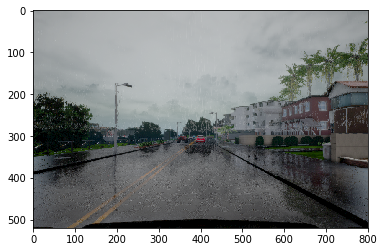

In [8]:
plt.imshow(img_frame[0])

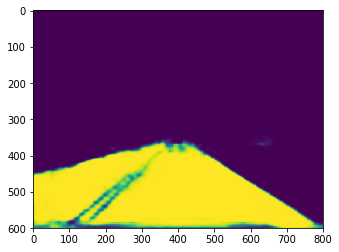

In [9]:
plt.imshow(result_road_image[0])

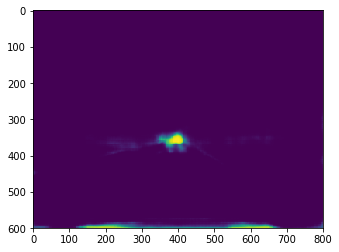

In [10]:
plt.imshow(result_car_image[0])